In [43]:
import pandas as pd
df = pd.read_csv("./df_concat(최종388개).csv")
df = df.dropna()
c = 0.2
df

,name,num,col,col1,col2,wish,day,price,day1,price1,...,category,high/low,W1M0,line,scrap,disrupt,X,event,prm,emb
0,(W) nike Dunk High Aluminum,DD1869-107,WHITE/ALUMINUM,white,blue,5072,2021-08-17,129000,2021-07-24,170000,...,dunk,high,w,nm,0,0,0,0,0,0
1,(W) nike Dunk High Black and White,DD1869-103,WHITE/BLACK-UNIVERSITY RED,white,black,10000,2021-05-01,129000,2021-05-01,299500,...,dunk,high,w,nm,0,0,0,0,0,0
2,(W) nike Dunk High Crimson Tint,DD1869-104,SAIL/CRIMSON TINT,white,pink,1381,2021-06-04,129000,2021-05-22,130000,...,dunk,high,w,nm,0,0,0,0,0,0
3,(W) nike Dunk High Dark Sulfur,DD1869-106,WHITE/DARK SULFUR-WHITE,white,yellow,2607,2021-04-16,129000,2021-04-16,207692,...,dunk,high,w,sp,0,0,0,0,0,0
4,(W) nike Dunk High Football Grey,DD1869-102,SAIL/FOOTBALL GREY-PALE IVORY,white,grey,5488,2021-01-07,129000,2021-01-06,166000,...,dunk,high,w,nm,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Adidas Yeezy Boost 700 V2 Mauve,GZ0724,MAUVE/MAUVE/MAUVE,grey,grey,751,2021-09-25,309000,2021-09-25,344455,...,yeezy,low,m,nm,0,0,0,0,0,0
385,Adidas Yeezy Boost 700 Wash Orange,GW0296,WASH ORANGE/WASH ORANGE/WASH ORANGE,blue,orange,362,2021-10-15,309000,2021-10-16,324500,...,yeezy,low,m,nm,0,0,0,0,0,0
386,Adidas Yeezy QNTM Barium,H68771,BARIUM/BARIUM/BARIUM,beige,black,800,2020-06-25,329000,2020-06-25,542600,...,yeezy,low,m,nm,0,0,0,0,0,0
387,Adidas Yeezy QNTM Lifestyle,Q46473,QNTM,black,black,1294,2020-09-05,329000,2020-06-08,1250000,...,yeezy,low,m,nm,0,0,0,0,0,0


In [44]:
df = df.drop(["name", "num","day", "day1","col"], axis = 1)

In [45]:
growth = ((df['min']-df['price1'])/df['price1'] * 100)
growth.describe()

a = growth.describe().tolist()[4]
b = growth.describe().tolist()[6]

# c = 0.9

top = b + c*(b-a)
bottom = a - c*(b-a)

df = df[(growth <= top) & (growth >= bottom)]
# df = df[df['min']>=0]
num = len(df)
df

,col1,col2,wish,price,price1,price2,price3,min,brand,category,high/low,W1M0,line,scrap,disrupt,X,event,prm,emb
0,white,blue,5072,129000,170000,150000,150750,132700,nike,dunk,high,w,nm,0,0,0,0,0,0
1,white,black,10000,129000,299500,315000,350000,214500,nike,dunk,high,w,nm,0,0,0,0,0,0
3,white,yellow,2607,129000,207692,197200,193455,160000,nike,dunk,high,w,sp,0,0,0,0,0,0
5,black,brown,892,129000,149000,149000,143000,127000,nike,dunk,high,w,nm,0,0,0,0,0,0
8,white,orange,1061,139000,150000,138000,132000,120000,nike,dunk,high,w,se,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,black,black,764,289000,420000,420000,420000,353667,adidas,yeezy,low,m,nm,0,0,0,0,0,0
383,ivory,ivory,2647,309000,622000,642000,679000,464000,adidas,yeezy,low,m,nm,0,0,0,0,0,0
384,grey,grey,751,309000,344455,343667,329760,314000,adidas,yeezy,low,m,nm,0,0,0,0,0,0
385,blue,orange,362,309000,324500,319000,319000,245000,adidas,yeezy,low,m,nm,0,0,0,0,0,0


In [46]:
# 색상값 1
df_col1 = pd.get_dummies(df['col1'], prefix = 'col1')
df_col2 = pd.get_dummies(df['col2'], prefix = 'col2')
df_co1_1 = pd.concat([df_col1 , df_col2], axis =1)

# 카테고리
df_category = pd.get_dummies(df['category'], prefix = 'category')

# 로우하이
df_high_low_mid = pd.get_dummies(df['high/low'], prefix = 'high/low/mid')

# 브랜드
df_brand = pd.get_dummies(df['brand'], prefix = 'brand')

# line
df_line = pd.get_dummies(df['line'], prefix = 'line')

# 성별
df_sex = pd.get_dummies(df['W1M0'], prefix = 'W1M0')

df_final_p = pd.concat([df_co1_1, df_category, df_high_low_mid, df_brand, df_line, df_sex], axis =1)

In [47]:
df_copy = df.copy().drop(["col1","col2","brand","category","high/low","W1M0","line"], axis = 1)

In [48]:
df = pd.concat([df_copy, df_final_p], axis = 1)

In [49]:
data = df.drop("min", axis = 1)

In [50]:
data.to_numpy()

array([[  5072, 129000, 170000, ...,      0,      0,      1],
       [ 10000, 129000, 299500, ...,      0,      0,      1],
       [  2607, 129000, 207692, ...,      1,      0,      1],
       ...,
       [   751, 309000, 344455, ...,      0,      1,      0],
       [   362, 309000, 324500, ...,      0,      1,      0],
       [   800, 329000, 542600, ...,      0,      1,      0]])

In [51]:
df['min'].to_numpy()

array([ 132700,  214500,  160000,  127000,  120000,  213571,  139333,
        269000,  165167,  158000,  186700,  176000,  200000,  185000,
        126000,  214000,  117000,  228615,  151727,  255000,  205000,
        174000,  563500,  356000,  226333,  340000,  162000,  129000,
        147600,  139000,  142429,  183500,  181111,  172000,  132000,
        160000,  170000,  251267,  268667,  118500,  147500,  168129,
        145000,  141500,  122167,  130000,  151750,  126000,  143571,
        326000,  136800,  135000,   82000,   99000,  230000,  259000,
        295000,  289000,  229000,  429167,  131000,  190000,  108667,
        109000,  119000,  230000,  311000,  636625,  522000,  312500,
       1236667,  544750,  396875,  560000,  711000,  282000,  302300,
        200000,  330195,  133000,  128750,  144000,  230000,  106000,
        300000,  279000,  221667,  122500,  308600,  115000,  157000,
        381000,  180000,  207125,  165000,  119000,  134500,  150000,
        120000,  148

## 랜덤포레스트

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns

In [53]:
X = data.to_numpy()
y = df['min'].to_numpy()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# 70프로를 트레이닝 셋, 30프로를 테스트 셋
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123) # 70% training and 30% test

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# estimators  : 랜덤 포레스트 안에 만들어지는 의사결정 나무의 갯수
clf = RandomForestClassifier(n_estimators=100)

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = clf.predict(X_test)

In [60]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.013157894736842105


In [61]:
score_r = metrics.accuracy_score(y_test, y_pred)

In [62]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 77095.625138


In [63]:
rmse_r = rmse

In [64]:
data_a = data.columns.tolist()

In [65]:
# 영향
feature_imp = pd.Series(clf.feature_importances_, index=data_a).sort_values(ascending=False)
feature_imp

wish                 0.089596
price1               0.089357
price3               0.088253
price2               0.086061
price                0.064430
                       ...   
category_jordan 5    0.001053
col2_lime            0.001048
col2_silver          0.000000
scrap                0.000000
col2_ivory           0.000000
Length: 75, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


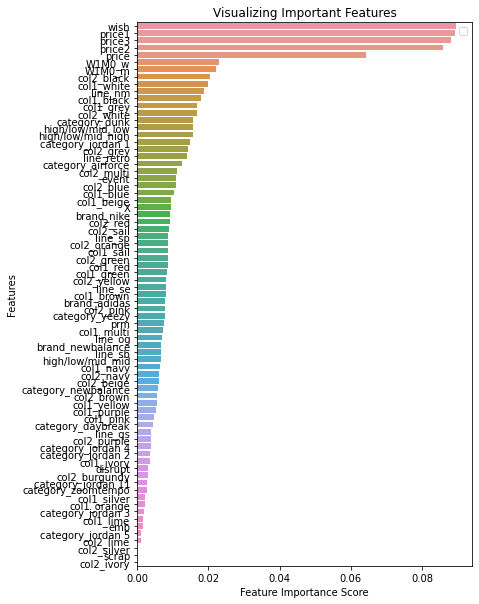

In [66]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(6,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

pca

## 다중회귀

In [67]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

LinearRegression()

In [68]:
y_predict = mlr.predict(X_test)

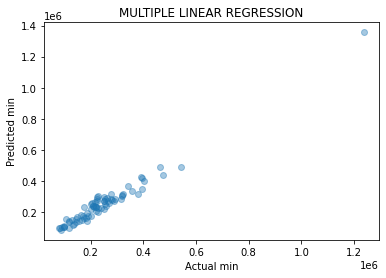

In [69]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual min")
plt.ylabel("Predicted min")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

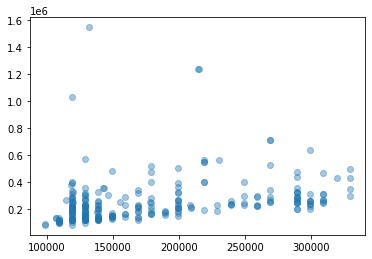

In [70]:
plt.scatter(df[['price']], df[['min']], alpha=0.4)
plt.show()

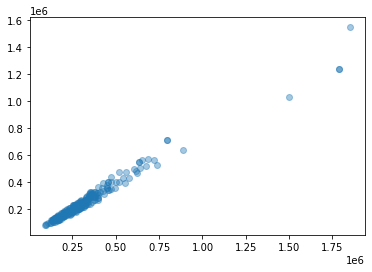

In [71]:
plt.scatter(df[['price1']], df[['min']], alpha=0.4)
plt.show()

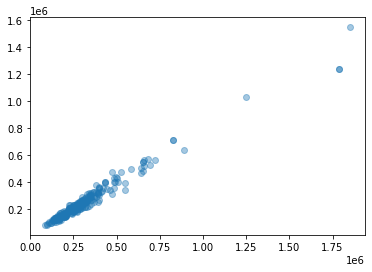

In [72]:
plt.scatter(df[['price2']], df[['min']], alpha=0.4)
plt.show()

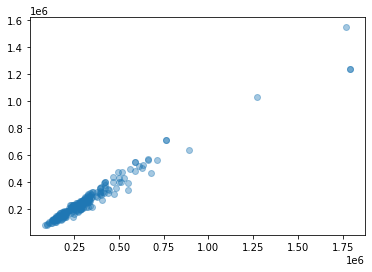

In [73]:
plt.scatter(df[['price3']], df[['min']], alpha=0.4)
plt.show()

In [74]:
print(mlr.coef_)

[-4.18566624e-03  5.29516752e-02  3.92157311e-01  3.32505649e-01
  2.09129779e-02 -2.66209099e-09 -2.19975802e+04  4.36181037e+03
 -1.70304499e+03 -3.00793296e+04  3.39061305e+04 -9.25974382e+03
  2.78899050e+03 -6.68893657e+03 -6.96287359e+02 -4.49743178e+03
  1.09811707e+04 -9.17033566e+03 -9.69229523e+03  1.21728946e+03
 -1.65315243e+03  1.69877307e+04  1.02159204e+04 -1.29581752e+03
 -7.42732029e+03 -1.58136707e+04  4.03845505e+04 -4.12249253e+03
 -1.22581685e+04  9.38760293e+03  3.70757864e+03  8.85275048e+03
  4.14987730e+03 -1.02944973e+04  3.16042271e+03 -9.09774135e+03
  3.45607987e-11 -6.09249135e+03  1.18787372e+04 -1.03774154e+04
 -8.73194059e+03 -1.22426966e+04 -1.76474778e+04 -1.16619345e+03
  1.75693061e+04 -3.63797881e-12  1.03547527e+04  6.58942582e+03
 -6.42562607e+03  1.01189160e+04  1.60250413e+03  3.04467326e+03
  1.12539532e+04 -2.39346247e+04 -1.76515041e+04  9.44173783e+04
 -2.17136494e+04 -1.60471687e+03  1.69365702e+03 -5.08009608e+04
  2.78172738e+03  4.59442

In [75]:
print(mlr.score(X_train, y_train))

0.9858503584084441


In [76]:
score_d = mlr.score(X_train, y_train)

In [77]:
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 32248.539460


In [78]:
rmse_d = rmse

## XGBoost

In [79]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [80]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100)

In [81]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[02:57:51] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 18413.984535


In [83]:
rmse_x = rmse

In [84]:
print(c)
print(num)
print(score_r)
print(score_d)
print(rmse_r)
print(rmse_d)
print(rmse_x)

0.2
251
0.013157894736842105
0.9858503584084441
77095.62513767186
32248.53946045243
18413.984534994688
